In [13]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import cross_val_score,  StratifiedKFold
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score

In [2]:
train_df=pd.read_csv("D:/STUDIA/ROK_II/Magisterka/Modele/Dane pierwotne/Dane_do_uczenia_T.csv", encoding="utf-8")
del train_df['Unnamed: 0']

In [3]:
train_df

,ENSG00000168779.18,ENSG00000043355.9,ENSG00000139800.8,ENSG00000095752.5,ENSG00000114270.14,ENSG00000143320.7,ENSG00000104112.7,ENSG00000168703.5,ENSG00000116176.6,ENSG00000188523.7,...,ENSG00000104755.13,ENSG00000250256.1,ENSG00000259447.1,ENSG00000235864.1,ENSG00000227718.1,ENSG00000229370.1,ENSG00000254434.1,ENSG00000233146.1,ENSG00000251969.3,scale
0,6.418540,2.139513,2.139513,9.984396,139.068370,134.076172,11.410738,67.038086,173.300584,16.402936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.426342,0.713171,0.000000,T1
1,4.254904,0.850981,0.000000,0.850981,45.101982,22.125501,84.247098,1.701962,11.913731,5.956866,...,0.850981,0.000000,0.850981,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
2,1.931528,0.643843,0.000000,40.562078,452.621281,237.577884,6.438425,0.000000,16.096063,3.219213,...,0.000000,0.000000,0.643843,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
3,0.870129,0.000000,0.000000,123.558325,773.544728,262.778974,15.662323,2.610387,70.480453,1.740258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.870129,T1
4,2.718041,2.718041,2.718041,39.411591,145.415179,88.336324,19.026285,1167.398495,16.308244,16.308244,...,1.359020,0.000000,1.359020,1.359020,1.359020,0.0,0.000000,0.000000,0.000000,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,12.991861,2.362157,0.000000,1.181078,242.121051,54.329602,11.810783,3.543235,120.469986,1.181078,...,1.181078,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
951,9.498885,0.527716,0.000000,6.332590,184.172817,132.984384,8.971169,0.527716,26.913506,6.860306,...,0.527716,1.055432,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
952,0.000000,0.000000,0.000000,0.000000,434.417898,118.161668,159.865787,152.915100,28.961193,77.615998,...,0.000000,0.000000,0.000000,1.158448,0.000000,0.0,0.000000,0.000000,0.000000,T3
953,24.591858,16.394572,0.000000,21.859430,1153.084920,2191.407833,13.662144,5.464857,360.680591,0.000000,...,0.000000,8.197286,0.000000,0.000000,2.732429,0.0,0.000000,0.000000,0.000000,T3


In [4]:
train_df

,ENSG00000168779.18,ENSG00000043355.9,ENSG00000139800.8,ENSG00000095752.5,ENSG00000114270.14,ENSG00000143320.7,ENSG00000104112.7,ENSG00000168703.5,ENSG00000116176.6,ENSG00000188523.7,...,ENSG00000104755.13,ENSG00000250256.1,ENSG00000259447.1,ENSG00000235864.1,ENSG00000227718.1,ENSG00000229370.1,ENSG00000254434.1,ENSG00000233146.1,ENSG00000251969.3,scale
0,6.418540,2.139513,2.139513,9.984396,139.068370,134.076172,11.410738,67.038086,173.300584,16.402936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.426342,0.713171,0.000000,T1
1,4.254904,0.850981,0.000000,0.850981,45.101982,22.125501,84.247098,1.701962,11.913731,5.956866,...,0.850981,0.000000,0.850981,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
2,1.931528,0.643843,0.000000,40.562078,452.621281,237.577884,6.438425,0.000000,16.096063,3.219213,...,0.000000,0.000000,0.643843,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T1
3,0.870129,0.000000,0.000000,123.558325,773.544728,262.778974,15.662323,2.610387,70.480453,1.740258,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.870129,T1
4,2.718041,2.718041,2.718041,39.411591,145.415179,88.336324,19.026285,1167.398495,16.308244,16.308244,...,1.359020,0.000000,1.359020,1.359020,1.359020,0.0,0.000000,0.000000,0.000000,T1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,12.991861,2.362157,0.000000,1.181078,242.121051,54.329602,11.810783,3.543235,120.469986,1.181078,...,1.181078,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
951,9.498885,0.527716,0.000000,6.332590,184.172817,132.984384,8.971169,0.527716,26.913506,6.860306,...,0.527716,1.055432,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,T3
952,0.000000,0.000000,0.000000,0.000000,434.417898,118.161668,159.865787,152.915100,28.961193,77.615998,...,0.000000,0.000000,0.000000,1.158448,0.000000,0.0,0.000000,0.000000,0.000000,T3
953,24.591858,16.394572,0.000000,21.859430,1153.084920,2191.407833,13.662144,5.464857,360.680591,0.000000,...,0.000000,8.197286,0.000000,0.000000,2.732429,0.0,0.000000,0.000000,0.000000,T3


In [5]:
y=train_df['scale']
del train_df['scale']

In [6]:
train_df

,ENSG00000168779.18,ENSG00000043355.9,ENSG00000139800.8,ENSG00000095752.5,ENSG00000114270.14,ENSG00000143320.7,ENSG00000104112.7,ENSG00000168703.5,ENSG00000116176.6,ENSG00000188523.7,...,ENSG00000248740.4,ENSG00000104755.13,ENSG00000250256.1,ENSG00000259447.1,ENSG00000235864.1,ENSG00000227718.1,ENSG00000229370.1,ENSG00000254434.1,ENSG00000233146.1,ENSG00000251969.3
0,6.418540,2.139513,2.139513,9.984396,139.068370,134.076172,11.410738,67.038086,173.300584,16.402936,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.426342,0.713171,0.000000
1,4.254904,0.850981,0.000000,0.850981,45.101982,22.125501,84.247098,1.701962,11.913731,5.956866,...,1.701962,0.850981,0.000000,0.850981,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
2,1.931528,0.643843,0.000000,40.562078,452.621281,237.577884,6.438425,0.000000,16.096063,3.219213,...,0.643843,0.000000,0.000000,0.643843,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.870129,0.000000,0.000000,123.558325,773.544728,262.778974,15.662323,2.610387,70.480453,1.740258,...,0.870129,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.870129
4,2.718041,2.718041,2.718041,39.411591,145.415179,88.336324,19.026285,1167.398495,16.308244,16.308244,...,0.000000,1.359020,0.000000,1.359020,1.359020,1.359020,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,12.991861,2.362157,0.000000,1.181078,242.121051,54.329602,11.810783,3.543235,120.469986,1.181078,...,0.000000,1.181078,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
951,9.498885,0.527716,0.000000,6.332590,184.172817,132.984384,8.971169,0.527716,26.913506,6.860306,...,0.000000,0.527716,1.055432,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
952,0.000000,0.000000,0.000000,0.000000,434.417898,118.161668,159.865787,152.915100,28.961193,77.615998,...,0.000000,0.000000,0.000000,0.000000,1.158448,0.000000,0.0,0.000000,0.000000,0.000000
953,24.591858,16.394572,0.000000,21.859430,1153.084920,2191.407833,13.662144,5.464857,360.680591,0.000000,...,40.986431,0.000000,8.197286,0.000000,0.000000,2.732429,0.0,0.000000,0.000000,0.000000


In [7]:
scaler = StandardScaler()

In [8]:
zestaw_caly = scaler.fit_transform(train_df)
zestaw_caly = np.array(zestaw_caly)
caly_label = np.array(y)


In [9]:
zestaw_caly

array([[-0.15545413, -0.19268726, -0.18007555, ..., -0.11325408,
        -0.1310684 , -0.14934876],
       [-0.1740803 , -0.20813705, -0.23130506, ..., -0.20152997,
        -0.17992108, -0.14934876],
       [-0.19408164, -0.21062068, -0.23130506, ..., -0.20152997,
        -0.17992108, -0.14934876],
       ...,
       [-0.21070965, -0.21834049, -0.23130506, ..., -0.20152997,
        -0.17992108, -0.14934876],
       [ 0.00099515, -0.02176597, -0.23130506, ..., -0.20152997,
        -0.17992108, -0.14934876],
       [ 0.03374514, -0.21834049, -0.23130506, ..., -0.20152997,
        -0.08266341, -0.14934876]])

In [10]:
caly_label

array(['T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1',
       'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T1', 'T

## 2. Dobrane parametry

### 2.1 Dobieranie parametrów

In [14]:
ftwo_scorer = make_scorer(f1_score,greater_is_better=True, average='macro')

In [15]:
ftwo_scorer

make_scorer(f1_score, average=macro)

In [16]:
param_grid = {
    'n_neighbors':range(1,110,1),
    'weights': ['uniform'],
    'algorithm': ['auto'],
    'leaf_size': range(1,20,1),
    'p': [1,2]
}


In [17]:
knn_2 = KNeighborsClassifier()
grid_search_2 = GridSearchCV(estimator = knn_2, param_grid = param_grid, 
                          cv = 5, n_jobs = 1, verbose = 1,scoring=ftwo_scorer)
grid_search_2.fit(zestaw_caly, np.ravel(caly_label))

Fitting 5 folds for each of 4142 candidates, totalling 20710 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'algorithm': ['auto'], 'leaf_size': range(1, 20),
                         'n_neighbors': range(1, 110), 'p': [1, 2],
                         'weights': ['uniform']},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [18]:
grid_search_2.best_score_

0.46771740646483095

In [19]:
grid_search_2.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 4,
 'p': 2,
 'weights': 'uniform'}

In [21]:
grid_search_2.best_estimator_

KNeighborsClassifier(leaf_size=1, n_neighbors=4)

In [20]:
#grid_search_2.best_score_ 0.22566667636025242

grid_search_2.best_params_

{'algorithm': 'auto',
 'leaf_size': 1,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

### 3. Z dobranymi parametrami 


In [22]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dane_do_zapisu_2=pd.DataFrame()
licznik=1
wart_2=[]
for train, test in kfold.split(zestaw_caly, caly_label):
    reg = KNeighborsClassifier(leaf_size=1, n_neighbors=4, weights= 'uniform',p=2,algorithm='auto')
    reg.fit(zestaw_caly[train], caly_label[train])
    predykcje=reg.predict(zestaw_caly[test])
    dane_folda_2=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label[test],
                                "Fold":licznik})
    dane_do_zapisu_2=pd.concat([dane_do_zapisu_2,dane_folda_2])
    blad=f1_score(caly_label[test], predykcje,average='macro')
    wart_2.append(blad)
    licznik+=1

In [23]:
dane_do_zapisu_2.to_csv('D:\\STUDIA\\ROK_II\\Magisterka\\Modele\\Dane pierwotne\\Dane z cross-walidacji\\Klasa_T_KNN.csv')

In [24]:
sum(wart_2)/5

0.46510987636116524

In [25]:
wart_2

[0.45335707610610737,
 0.4426638176638176,
 0.4785279280692125,
 0.45335707610610737,
 0.4976434838605812]

In [26]:
cf_matrix = confusion_matrix(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'])

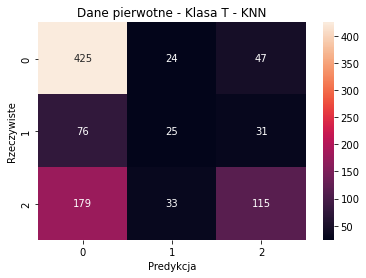

In [28]:

ax = plt.axes()
sns.heatmap(cf_matrix, annot=True, fmt='g')

ax.set_title('Dane pierwotne - Klasa T - KNN')
plt.ylabel('Rzeczywiste')
plt.xlabel('Predykcja')
plt.show()


In [29]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

precision = precision_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'],  average='macro')
recall = recall_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'],  average='macro')
f1score=f1_score(dane_do_zapisu_2['obs'], dane_do_zapisu_2['pred'], average='macro')
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1score: %.3f' % f1score)

Recall: 0.466
Precision: 0.509
F1score: 0.466
